In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel(r'C:\Users\shikh\OneDrive\Desktop\DA Project\Bank/Bank_Personal_Loan_Modelling.xlsx',1)

In [3]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df.shape

(5000, 14)

In [5]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [6]:
df.drop(['ID','ZIP Code'], axis=1, inplace = True)

In [7]:
df.isnull().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [8]:
import plotly.express as px

In [9]:
df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [11]:
fig = px.box(df, y = ['Age', 'Experience', 'Income', 'Family', 'Education'])
fig.show()

In [12]:
df.skew()

Age                  -0.029341
Experience           -0.026325
Income                0.841339
Family                0.155221
CCAvg                 1.598457
Education             0.227093
Mortgage              2.104002
Personal Loan         2.743607
Securities Account    2.588268
CD Account            3.691714
Online               -0.394785
CreditCard            0.904589
dtype: float64

In [13]:
df.dtypes

Age                     int64
Experience              int64
Income                  int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027BE1B08550>,
      dtype=object)

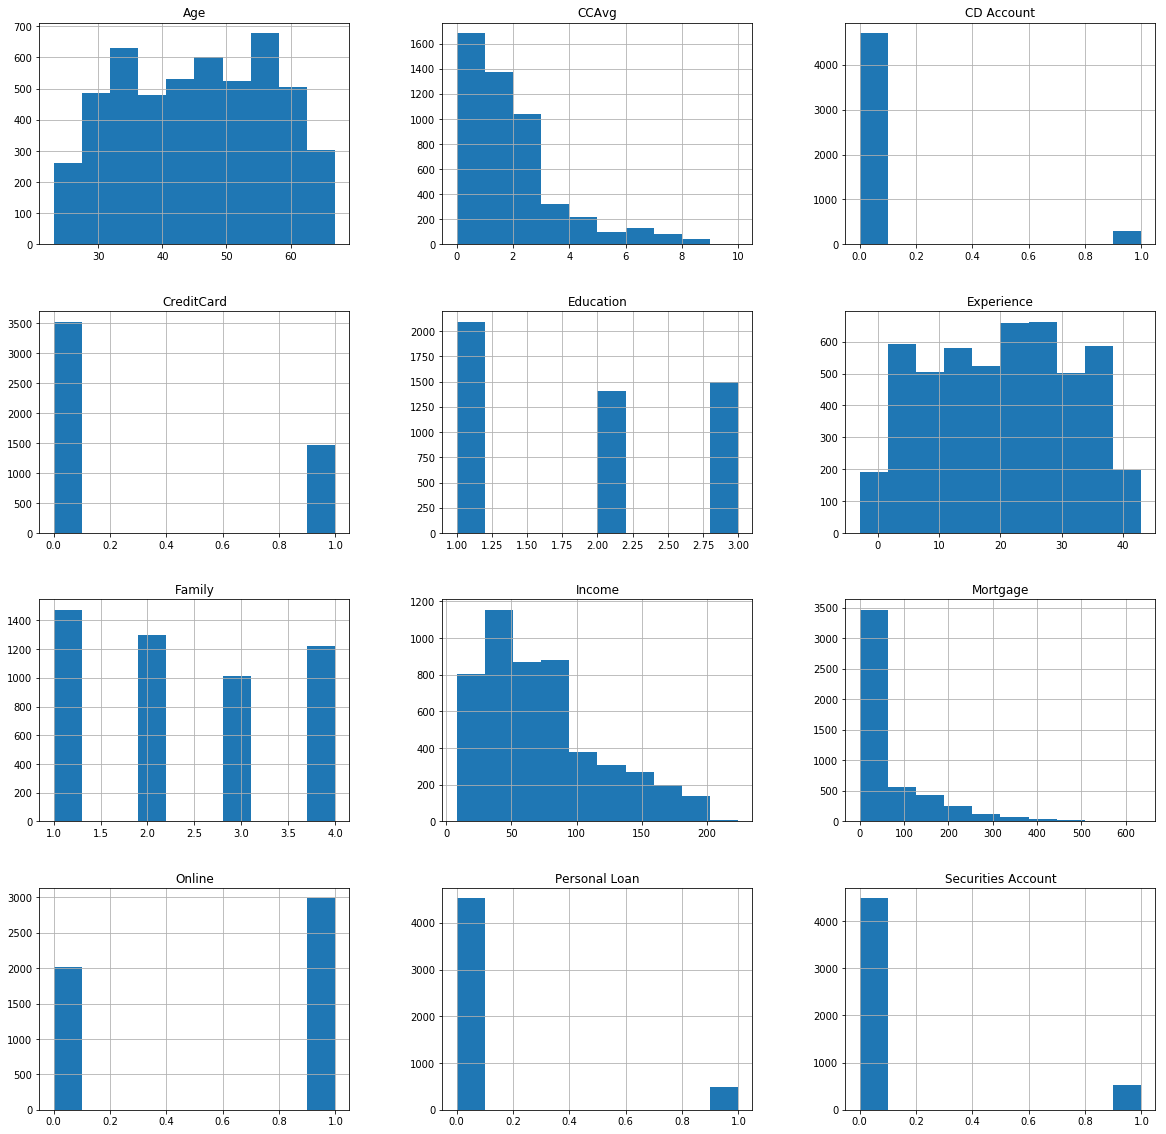

In [14]:
df.hist(figsize=(20,20))

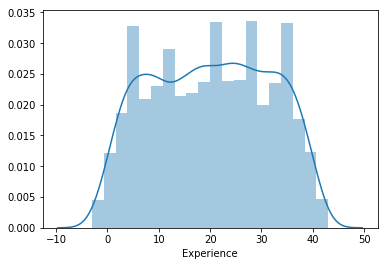

In [15]:
sns.distplot(df['Experience'])

In [16]:
negative_exp = df[df['Experience']<0]
negative_exp.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,25,-1,113,4,2.30,3,0,0,0,0,0,1
226,24,-1,39,2,1.70,2,0,0,0,0,0,0
315,24,-2,51,3,0.30,3,0,0,0,0,1,0
451,28,-2,48,2,1.75,3,89,0,0,0,1,0
524,24,-1,75,4,0.20,1,0,0,0,0,1,0


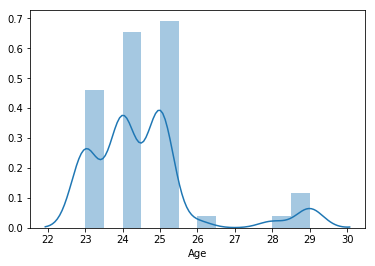

In [17]:
sns.distplot(negative_exp['Age'])

In [18]:
negative_exp['Experience'].mean()

-1.4423076923076923

In [19]:
print("There are {} records which has negative values for experience, approx {} %".format(negative_exp.size,((negative_exp.size/df.size)*100)))

There are 624 records which has negative values for experience, approx 1.04 %


In [20]:
data= df.copy()

In [21]:
data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [24]:
# Filling the negative values with mean

data['Experience'] = np.where(data['Experience']<0,data['Experience'].mean(), data['Experience'])

In [25]:
data[data['Experience']<0]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


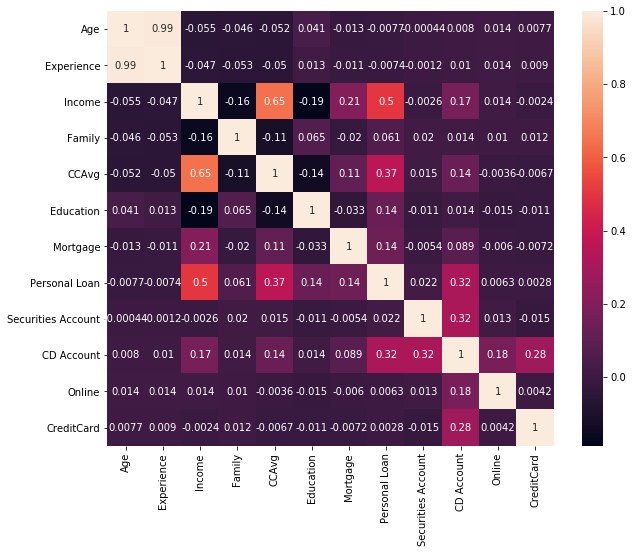

In [28]:
# Correlation of data
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

In [29]:
data  = data.drop(['Experience'], axis = 1)

In [33]:
def mark(x):
    if x==1:
        return 'Undergrad'
    elif x==2:
        return 'Graduate'
    else:
        return 'Professional'

In [35]:
data['Edu_mark']=  data['Education'].apply(mark)

In [36]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Edu_mark
0,25,49,4,1.6,1,0,0,1,0,0,0,Undergrad
1,45,34,3,1.5,1,0,0,1,0,0,0,Undergrad
2,39,11,1,1.0,1,0,0,0,0,0,0,Undergrad
3,35,100,1,2.7,2,0,0,0,0,0,0,Graduate
4,35,45,4,1.0,2,0,0,0,0,0,1,Graduate


In [40]:
edu_dis = data.groupby('Edu_mark')['Age'].count()

In [41]:
edu_dis

Edu_mark
Graduate        1403
Professional    1501
Undergrad       2096
Name: Age, dtype: int64

In [42]:
px.pie(data, values=edu_dis, names= edu_dis.index, title ='Pie Chart')

In [43]:
# Account holder distribution

In [44]:
def security_cd(row):
    if (row['Securities Account']==1) & (row['CD Account']==1):
        return 'Holds Securities & Deposits'
    elif (row['Securities Account']==0) & (row['CD Account']==0):
        return 'Does not Holds Securities & Deposits'
    elif (row['Securities Account']==1) & (row['CD Account']==0):
        return 'Holds Securities only'
    elif (row['Securities Account']==0) & (row['CD Account']==1):
        return 'Holds Deposits only'
    

In [47]:
data['account_type']=data.apply(security_cd, axis=1)

In [48]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Edu_mark,account_type
0,25,49,4,1.6,1,0,0,1,0,0,0,Undergrad,Holds Securities only
1,45,34,3,1.5,1,0,0,1,0,0,0,Undergrad,Holds Securities only
2,39,11,1,1.0,1,0,0,0,0,0,0,Undergrad,Does not Holds Securities & Deposits
3,35,100,1,2.7,2,0,0,0,0,0,0,Graduate,Does not Holds Securities & Deposits
4,35,45,4,1.0,2,0,0,0,0,0,1,Graduate,Does not Holds Securities & Deposits


In [49]:
values= data['account_type'].value_counts()

In [50]:
values

Does not Holds Securities & Deposits    4323
Holds Securities only                    375
Holds Deposits only                      155
Holds Securities & Deposits              147
Name: account_type, dtype: int64

In [51]:
px.pie(data, values= values, names= values.index, title ='Pie Chart')

In [52]:
# Analyse customer oon the basis of education, personall loan & income status

In [53]:
px.box(data, x='Education', y='Income', facet_col= 'Personal Loan')

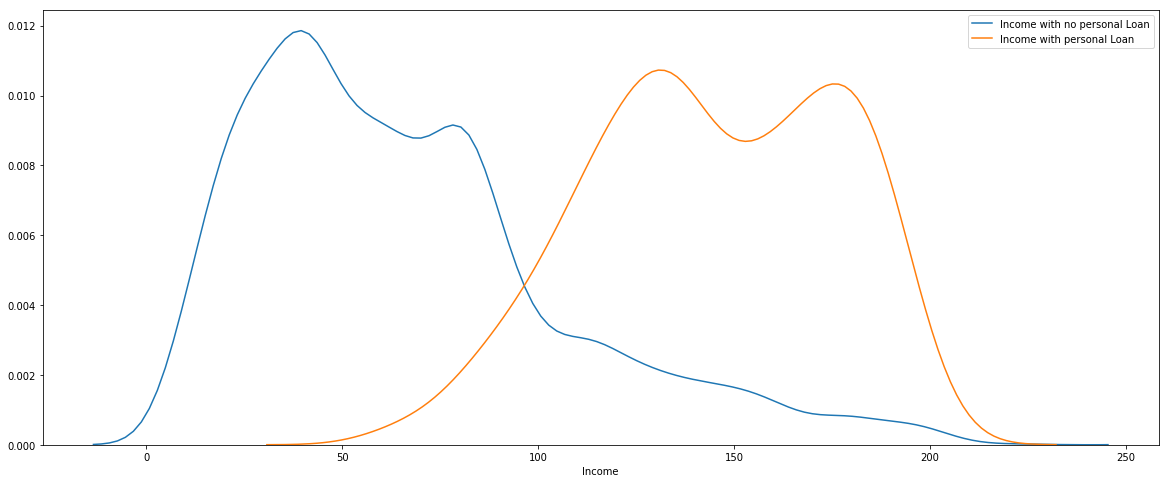

In [57]:
plt.figure(figsize=(20,8))
sns.distplot(data[data['Personal Loan']==0]['Income'], hist=False, label='Income with no personal Loan')
sns.distplot(data[data['Personal Loan']==1]['Income'], hist=False, label='Income with personal Loan')
plt.legend()


In [58]:
# Automating the above plot

In [59]:
def plot(col2,col1,label1,label2,title):
    plt.figure(figsize=(20,8))
    sns.distplot(data[data['Personal Loan']==0]['Income'], hist=False, label='Income with no personal Loan')
    sns.distplot(data[data['Personal Loan']==1]['Income'], hist=False, label='Income with personal Loan')
    plt.legend()
    plt.title(title)

In [60]:
# Categories of customers on the basis of attributes

In [61]:
data.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'Edu_mark', 'account_type'],
      dtype='object')

In [63]:
col_names = ['Securities Account','Online','account_type','CreditCard']


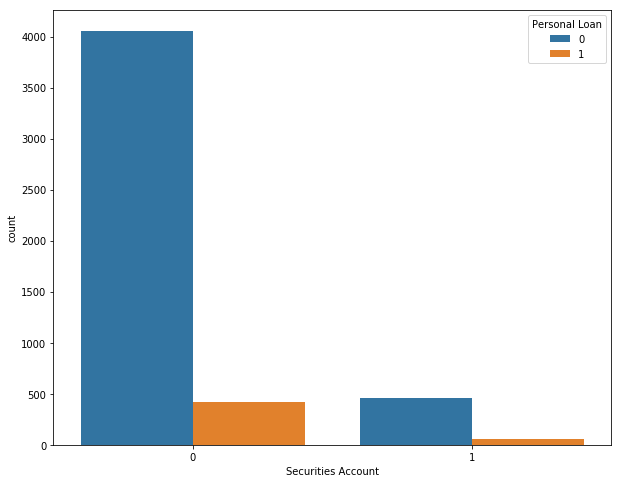

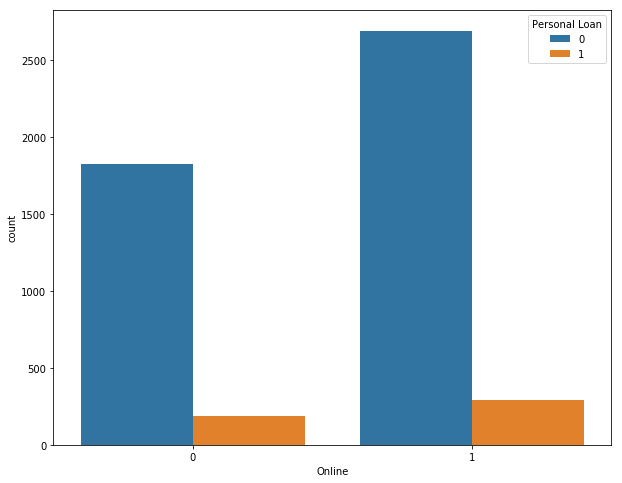

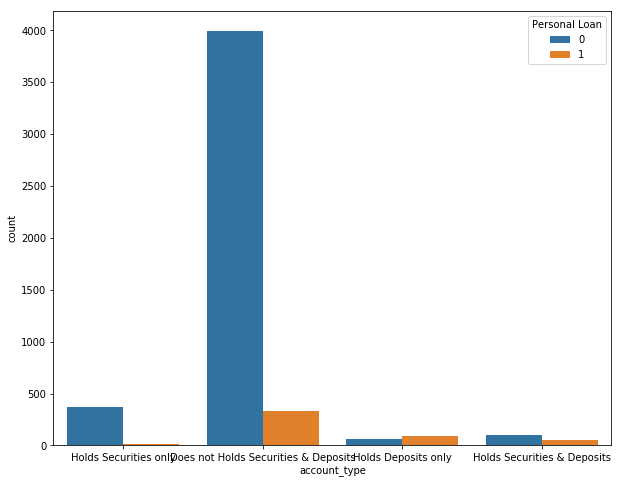

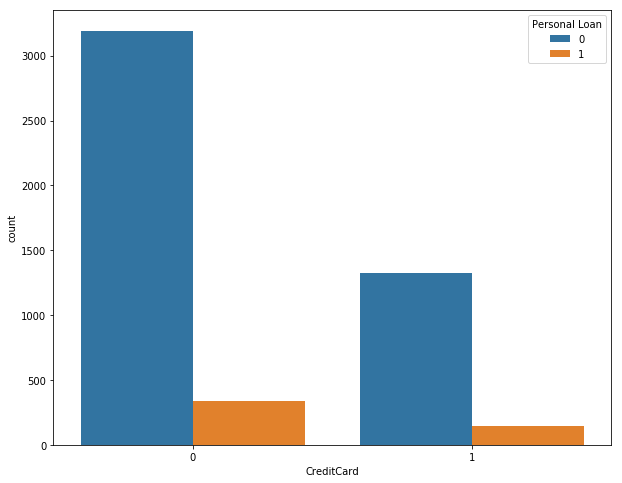

In [66]:
for i in col_names:
    plt.figure(figsize=(10,8))
    sns.countplot(x=i, hue='Personal Loan', data=data)

In [67]:
# Is age a factor in Loan ?

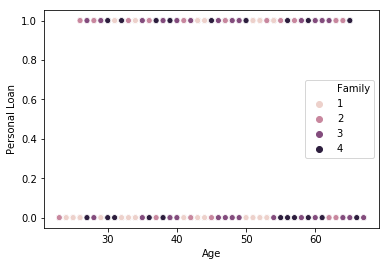

In [71]:
sns.scatterplot(data['Age'],data['Personal Loan'], hue=data['Family'])

In [73]:
# Performing hypothesis on data

In [74]:
import scipy.stats as stats

In [75]:
ho = 'age does not have impact on personal loan'
ha = 'age does have impact on personal loan'

In [76]:
age_no = np.array(data[data['Personal Loan']==0]['Age'])
age_yes = np.array(data[data['Personal Loan']==1]['Age'])

In [77]:
t,p_value = stats.ttest_ind(age_no,age_yes, axis=0)
if p_value>0.05:
    print(ha, 'as the p_value is less than 0.05 with value of {}'.format(p_value))
else:
    print(ho, 'as the p_value is more than 0.05 with value of {}'.format(p_value))

age does have impact on personal loan as the p_value is less than 0.05 with value of 0.584959263705325


In [78]:
# Automating the above task:

In [82]:
def Hypothesis(col1,col2,ho,ha):
    arr1 = np.array(data[data[col1]==0][col2])
    arr2 = np.array(data[data[col1]==1][col2])
    t,p_value = stats.ttest_ind(arr1,arr2, axis=0)
    if p_value>0.05:
        print('{} as the p_value is less than 0.05 with value of {}'.format(ha,p_value))
    else:
        print('{} as the p_value is more than 0.05 with value of {}'.format(ho,p_value))

In [83]:
Hypothesis('Personal Loan','Family',ho = 'family does have impact on personal loan', ha = 'family does not have impact on personal loan')

family does have impact on personal loan as the p_value is more than 0.05 with value of 1.4099040685673807e-05
